# Project Title = Credit Card Default Prediction - Classification Project

# Problem Description

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.


# Attribute Information:

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Importing Libraries

In [1]:
# Importing libraries for data manipulation and visualization
import numpy as np      # numerical computations
import pandas as pd     # data manipulations
import matplotlib.pyplot as plt  # Used for visualization
%matplotlib inline
import seaborn as sns   # Used for visualization
import warnings
warnings.filterwarnings('ignore')

# Dataset initialization

In [2]:
# Directory path
import os
os.chdir(r'C:\Users\Lenovo\Downloads\AlmaBetter Project\ML Classification Project')

In [3]:
# Loading Dataset
data = pd.read_csv('Credit_Card_Prediction.csv', header=1)

In [4]:
# Checking Top 5 rows of the dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Checking bottom 5 rows of the dataset
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
# Getting the shape of dataset: No of rows and column of the dataset
data.shape

(30000, 25)

There are 30000 rows and 25 features including dependent variable.

In [7]:
# getting all details of the features of credit card dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We can observe that our dataset have 30000 rows and 25 columns which has int datatypes.

In [8]:
#  gives the overall descriptive summary of the dataframe
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Features description :

ID: ID of each customer

LIMIT_BAL: Amount of the given credit (NT dollar):it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender(Male = 1, Female: 2)

EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)

MARRIAGE: Marital status (0 = unmarried 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid fully, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (same scale as given)
PAY_2: Repayment status in August, 2005 (same scale as given)
PAY_3: Repayment status in July, 2005 (same scale as given)
PAY_4: Repayment status in June, 2005 (same scale as given)
PAY_5: Repayment status in May, 2005 (same scale as given)
PAY_6: Repayment status in April, 2005 (same scale as given)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default payment next month: Default Payments(1 = Yes, 0 = No)

##### We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict if cutomer will default or not.

# Data processing 

In [9]:
# checking missing value
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

there are no missing value present in our dataset so, we don't have to deal with that.

In [10]:
#cheaking the duplicates values
data.duplicated().sum()

0

there is no duplicated value

In [11]:
# columns name
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

As we see above the some column name isn't understanding properly, so lets rename it for better convinience.
it will make our task easy in Exploratoy data analysis.

In [12]:
# rename the column
data.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY',
                     'PAY_6':'REPAY_APRIL',
                'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE',
                'BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE',
                'PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                'default payment next month': 'Next_month_default_Payments'},inplace = True)

In [13]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Next_month_default_Payments
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


few categorical feature :: 'SEX','EDUCATION','MARRIAGE'

In [14]:
# total count of sex feature
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [15]:
# total count of EDUCATION feature
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, In education column counts of 0,4,5,6 comes in others category so we'll merge all this in one category.

In [16]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

data["EDUCATION"] = data["EDUCATION"].replace({4:0,5:0,6:0})
data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [17]:
# total count of MARRIAGE feature
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Here also same in 'marriage' features 0 isn't explained so we put this 0 category to 3.

In [18]:
# Converting Marriage feature into 3 possible classifiation
colm = data['MARRIAGE'] == 0
data.loc[colm, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

# EDA-Exploratory Data Analysis & Data Visualization

# Univariate Analysis

### Dependent Variable Analysis

In [19]:
# Total counts of customers default payment of next months
data['Next_month_default_Payments'].value_counts()

0    23364
1     6636
Name: Next_month_default_Payments, dtype: int64

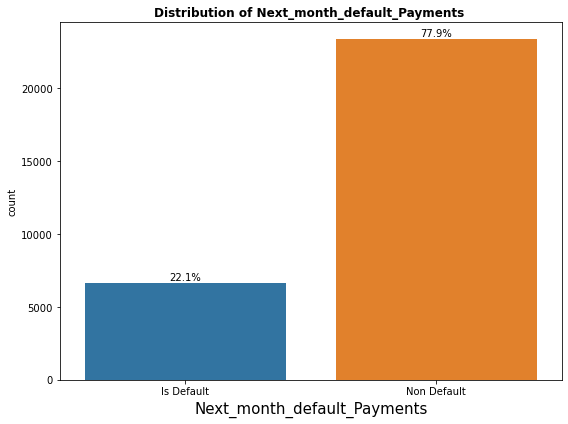

In [20]:
# Replacing the values of 0 and 1 to string values for better understanding.
data['Defaulter'] = data.Next_month_default_Payments.replace([0,1], ['Non Default','Is Default'])

#plot the count plot to check the data distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'Defaulter', data = data)
plt.xlabel("Next_month_default_Payments", fontsize= 15)
plt.title('Distribution of Next_month_default_Payments ',weight ='bold', fontsize= 12)

# This step is used for showing the percentage on the graph
total = len(data)
for p in ax.patches:       
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

From the above plot we clearly say that Defaulters are less than the Non Defaulters.
Approx 78% are Non Defaulters and 22% are Defaulters respectively.

As it can be seen clearly in Countplot that data is imbalanced.

Imbalanced data leads us to the wrong prediction as we know that Logistic and Random Forest have a bias nature towards the majority class it may be misclassified while fiting the model.

### Independent Variable Analysis

We have some categorical features in our dataset so Let's have some insights of categorical feature.
1) SEX	2) EDUCATION	3) MARRIAGE	

In [21]:
catvar = ['SEX','EDUCATION','MARRIAGE']

In [22]:
for feature in catvar:
    print(feature, ':')
    print(data[feature].value_counts())
    print("========================",'\n')

SEX :
2    18112
1    11888
Name: SEX, dtype: int64

EDUCATION :
2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

MARRIAGE :
2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64



Above Dataframe in which There is another thing that needs to be done here, we will have to change the classification denotation from 0,1,2,3 to a reasonable class for a better understanding of visualization.
e.g., Sex: (1 = Male,0 = Female) like that.

In [23]:
# lets replace the values of categorical column by names as given in the data above
data['SEX'].replace({1 : 'Male',2 : 'Female'}, inplace = True)
data['EDUCATION'].replace({1 : 'graduate school',2 : 'University',3 : 'High School',0 : 'Others'},inplace = True)
data['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'},inplace = True)

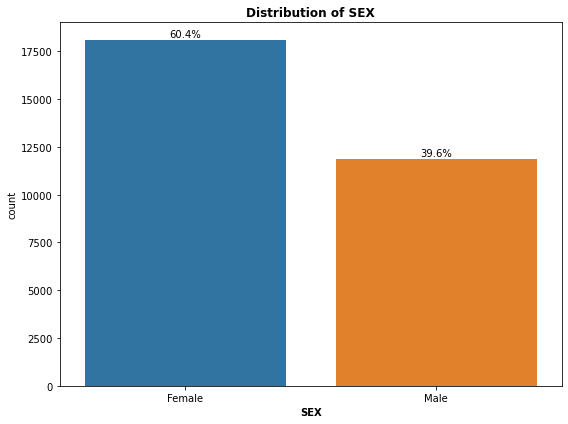

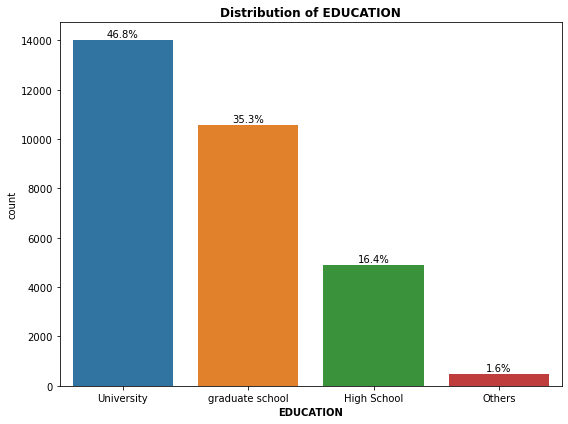

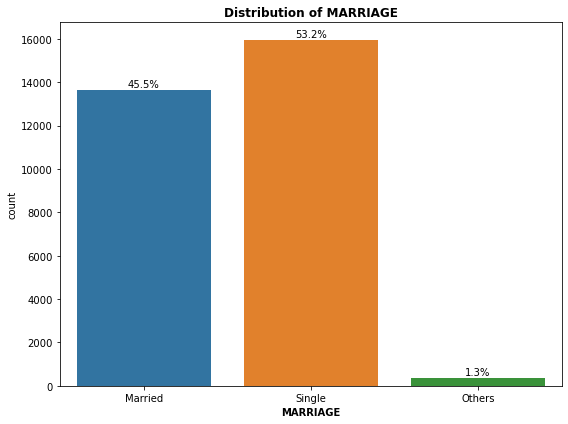

In [24]:
for feature in catvar:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x = data[feature])
    plt.xlabel(feature, fontsize= 10, weight='bold')
    plt.title('Distribution of {}'.format(feature), weight ='bold', fontsize= 12)

    # This step is used for showing the percentage on the graph
    total = len(data)
    for p in ax.patches:       
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()


From the above data analysis we can say that

1) SEX :  Number of Male credit holder is less than Female.

2) EDUCATION :  More number of credit holders are university students followed by Graduates and then High school students.

3) MARRIAGE : More number of credit cards holder are Single.

### AGE

In [25]:
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

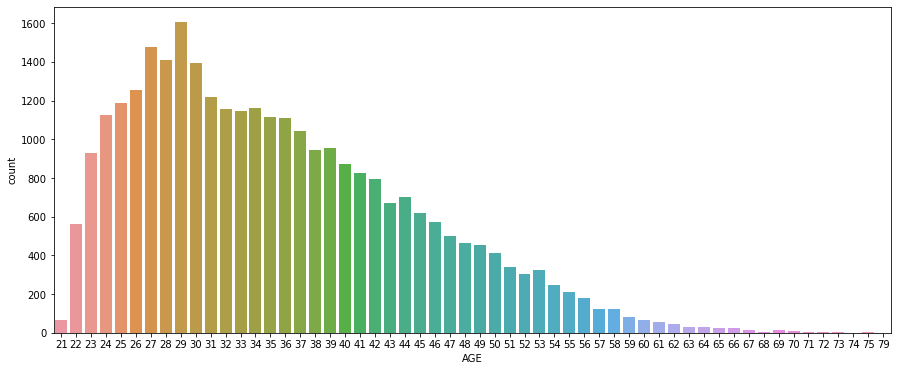

In [26]:
#plotting the count plot to vizualize the data distribution of AGE
plt.figure(figsize=(15,6))
sns.countplot(x = 'AGE', data = data)
plt.show()

From the above analysis we can say that there are  more number of credit cards holder age are between 26-30 years old.and 
Age above 60 years old rarely uses the credit card.

## Distribution of Re-payment status

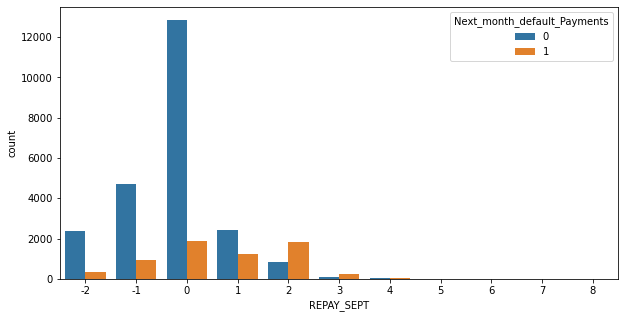

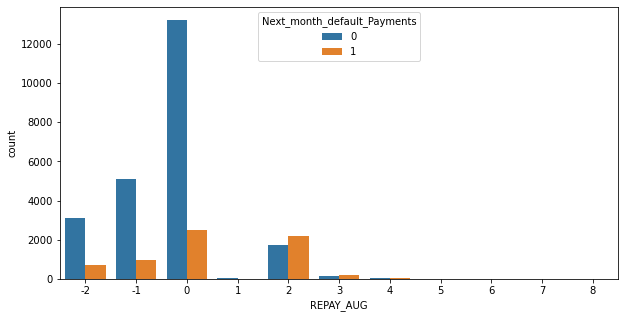

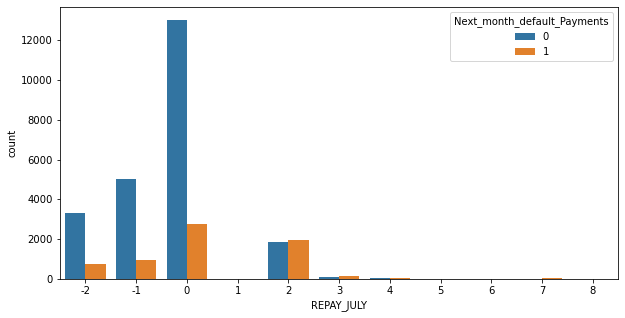

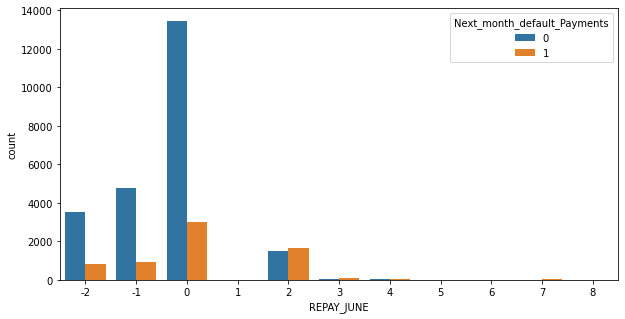

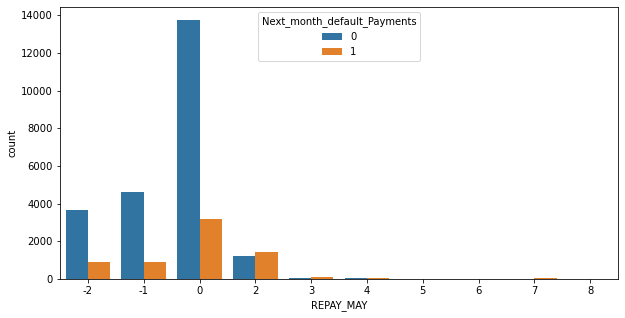

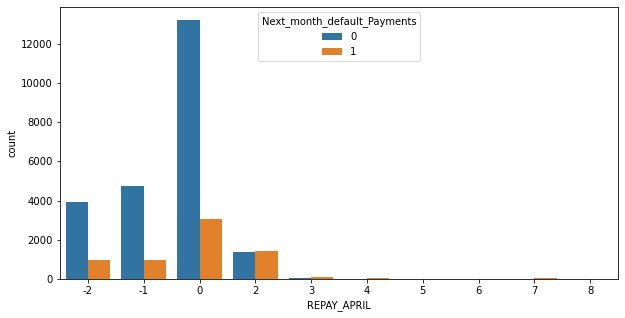

In [27]:
# looking at the payment columns for each month.
Repay_col = ['REPAY_SEPT','REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL']

# Plotting graph for payment columns 
for col in Repay_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'Next_month_default_Payments', data = data)

Describing the Xlabel: 
(-2 = No consumption, -1 = paid fully, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

### Distribution  bill  amount  for  each  months

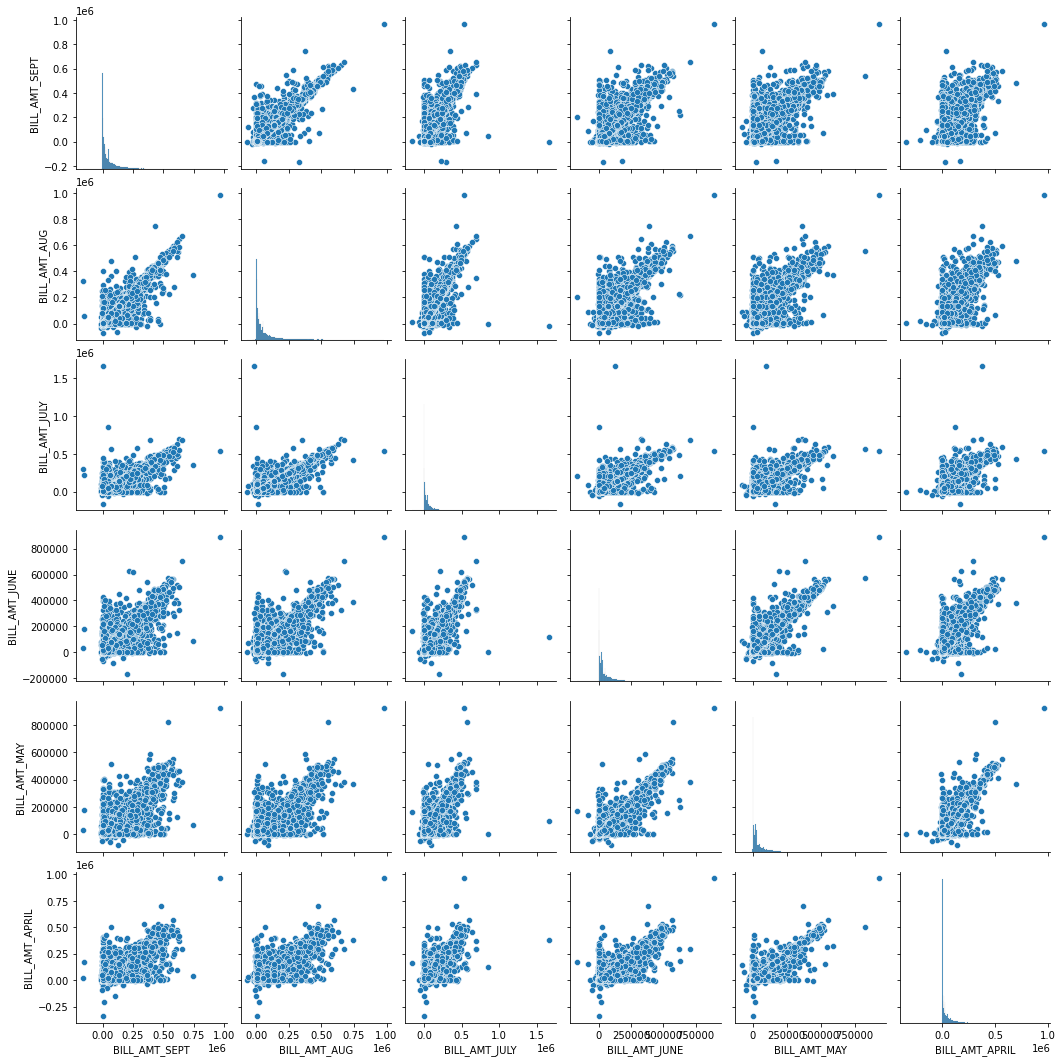

In [28]:
#assign the pairplot of BILL AMOUNT of different months
bill_amount = data[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE','BILL_AMT_MAY', 'BILL_AMT_APRIL']]
sns.pairplot(data = bill_amount)

from above matrix we can conclude that defaulters lie within the range of maximum Bill Payment of approximately 60,000(NT Dollar)

# Bivariate Analysis

### Categorical features with Dependent variable(Defaulter)

In [29]:
catvar

['SEX', 'EDUCATION', 'MARRIAGE']

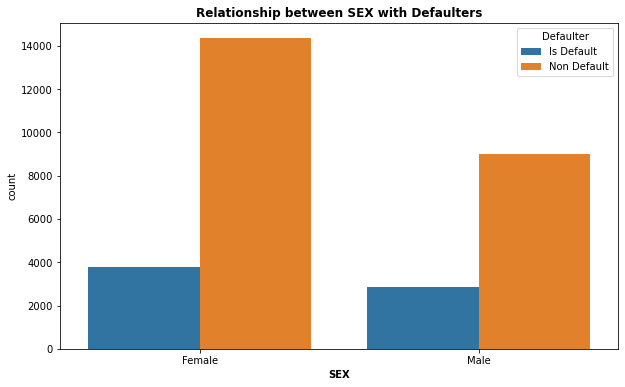

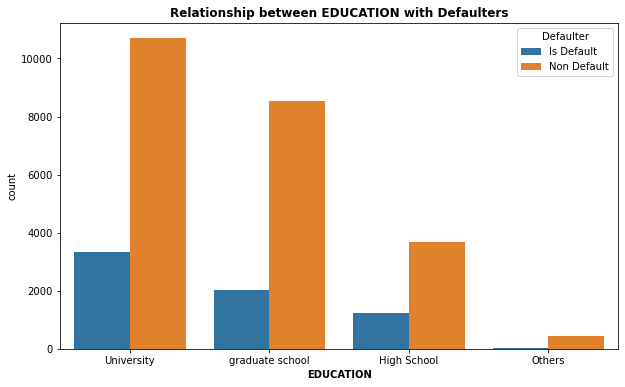

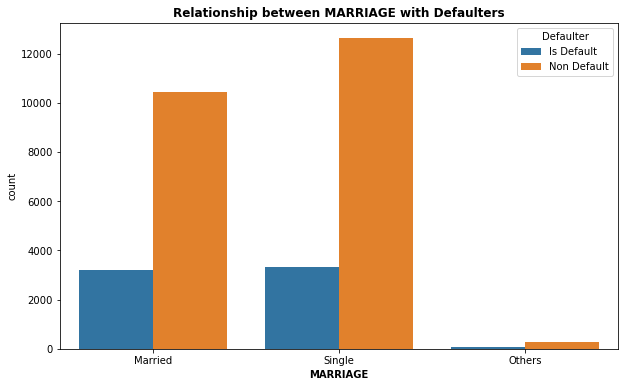

In [30]:
for feature in catvar:
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x = data[feature],hue = 'Defaulter',data=data)
    plt.xlabel(feature, fontsize= 10, weight='bold')
    plt.title('Relationship between {} with Defaulters'.format(feature), weight ='bold', fontsize= 12)


Insights of categorical feature with dependent variable ::

SEX = Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Females.

EDUCATION = University and Graduates are holding high proportions of Credit cards.so it is clear that those people who are University and Graduates have higher default payment wrt high school and others.

MARRIAGE = Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters.

### AGE Feature with Dependent variable(Defaulter)

In [31]:
# Here we groupby Age and Defaulter column to get number of defaults and non defaults. 
df_age =  data.groupby(['AGE', 'Defaulter']).size().unstack()
df_age

Defaulter,Is Default,Non Default
AGE,,
21,14.0,53.0
22,169.0,391.0
23,247.0,684.0
24,300.0,827.0
25,302.0,884.0
26,253.0,1003.0
27,313.0,1164.0
28,286.0,1123.0
29,313.0,1292.0


Text(0.5, 1.0, 'Relationship between AGE with Defaulters')

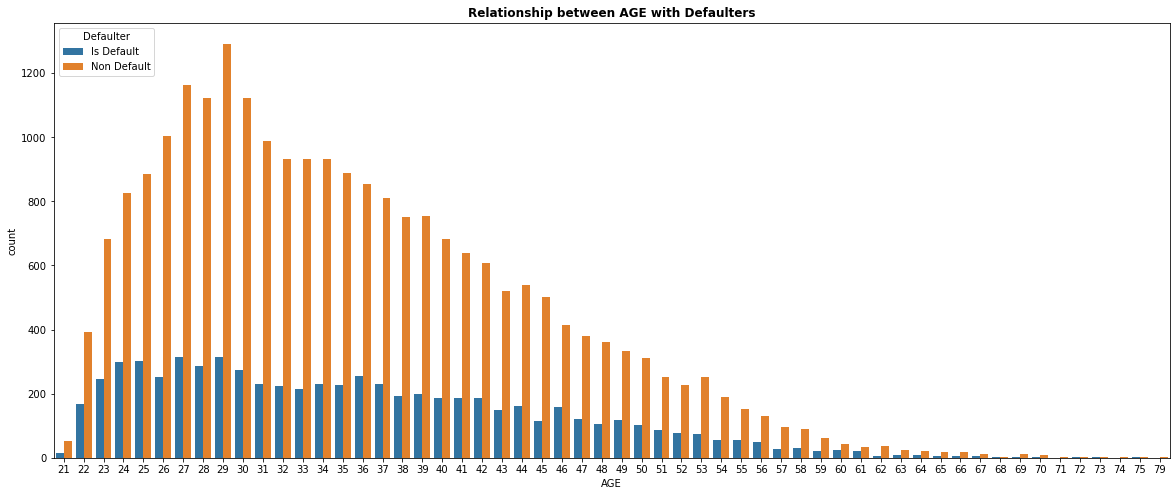

In [32]:
#plotting the count plot to vizualize the data distribution with respect to Age
plt.figure(figsize=[20,8])
sns.countplot(x = 'AGE', hue = 'Defaulter', data =data)
plt.title('Relationship between AGE with Defaulters', weight ='bold', fontsize= 12)

From the above graph we can say that, More number of credit card holders age between 26-31 years and 29 years age is the highest uses of credit card.
so, Also more number of Defaulters are between 27-29 years ages.

### LIMIT BALANCE Feature with Dependent variable(Defaulter)

Text(0, 0.5, 'defaulters')

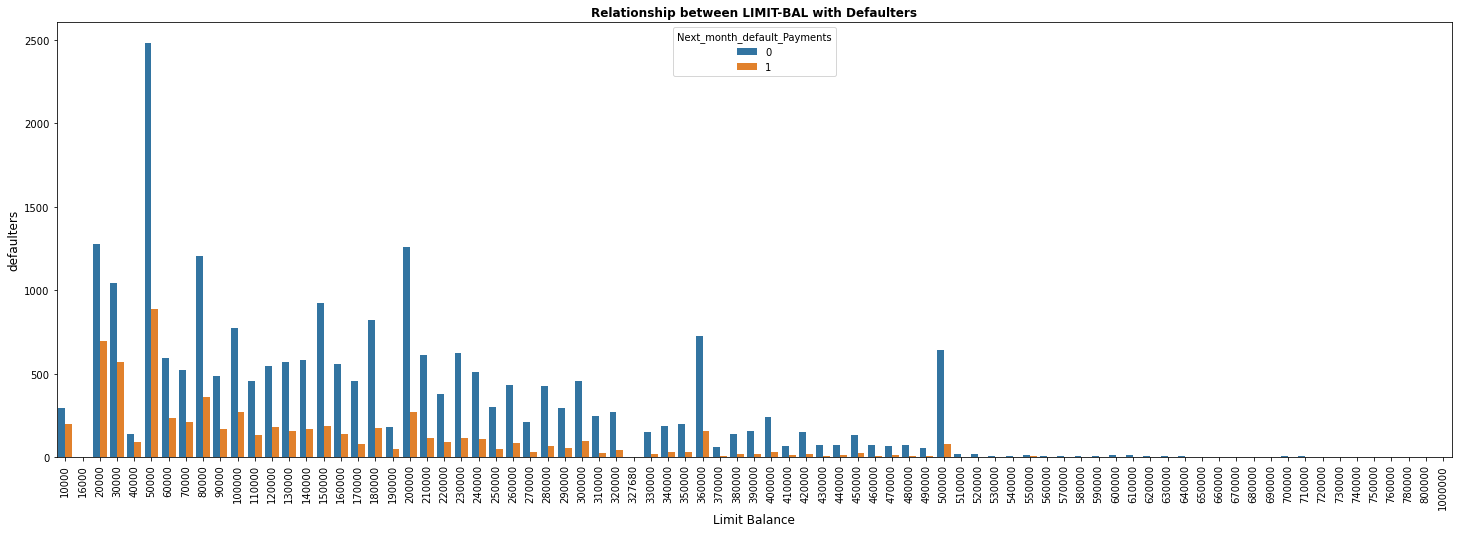

In [33]:
#plotting the bar plot to vizualize the data distribution
plt.figure(figsize = (25,8))
sns.countplot(x = 'LIMIT_BAL',hue = 'Next_month_default_Payments',data = data,)
plt.xticks(rotation = 90)
plt.title('Relationship between LIMIT-BAL with Defaulters', weight ='bold', fontsize= 12)
plt.xlabel('Limit Balance',fontsize = 12)
plt.ylabel('defaulters',fontsize = 12)

Above plot we clear that Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
After the credit limit 5,00,000, number of defaulters are almost negligible.

# Outliers Detection 

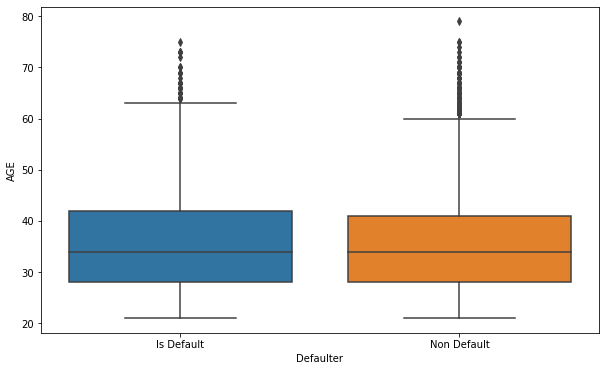

In [34]:
#Using boxplot to identify the outlier in the dataset between AGE and Defaulter
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="Defaulter", y="AGE", data=data)

Above boxplot show that more outliers are above the ages of 60 years in both classification. It means old-age people may be defaulters.

# Checking Correlation Between Variables

<AxesSubplot:>

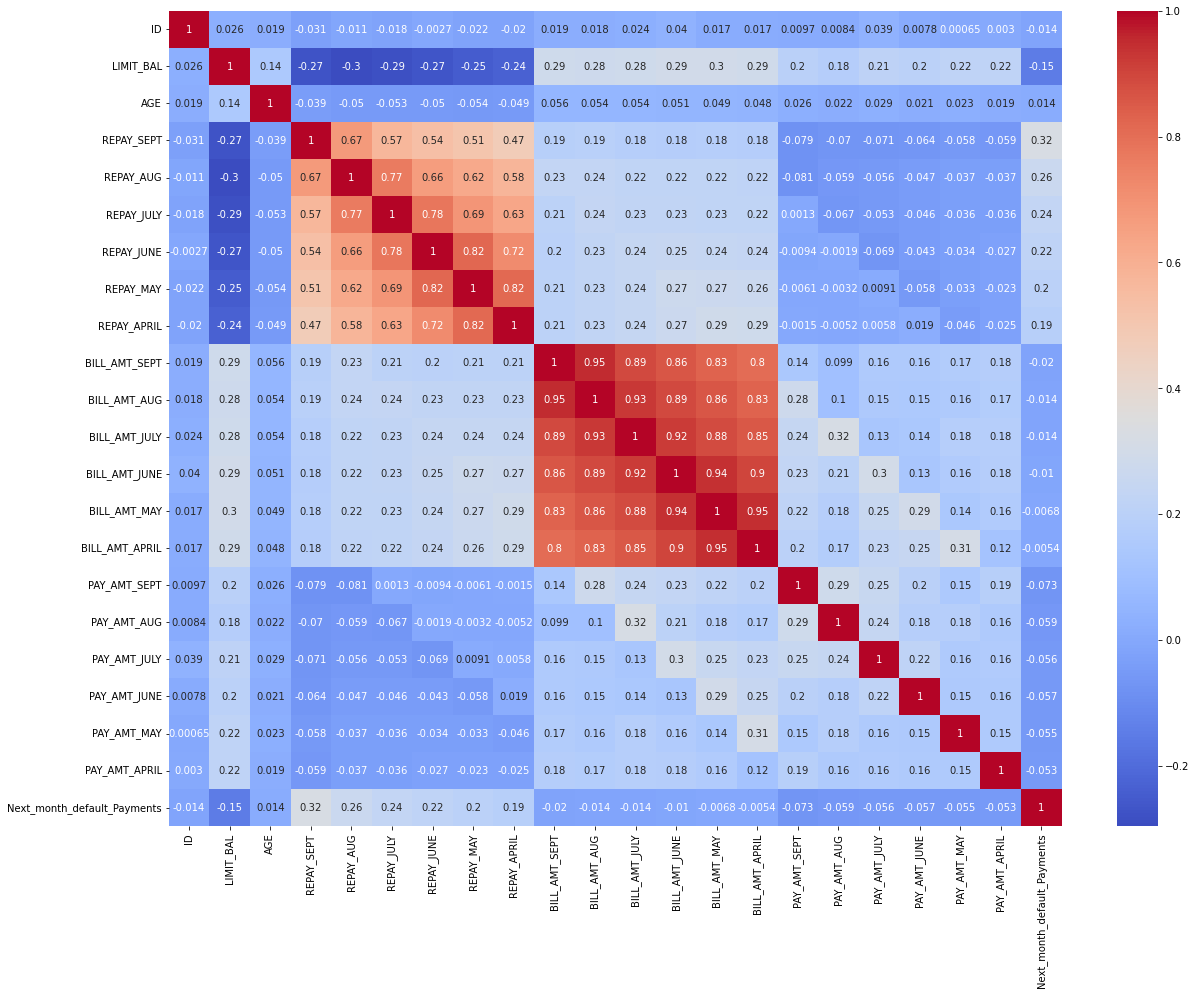

In [35]:
# let see more better correlation values between all the features in our dataset by using heatmap.
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

Above heatmap It seems there are some negatively correlated feature like age, ID, Limit bal and some others.but ID is unimportant and it has no role in prediction so we will remove it.

In [36]:
# drop the features that are in no use
data.drop(['Defaulter'],axis = 1,inplace = True)

# ONE-HOT ENCODING TECHNIQUE

In [37]:
# Transform features Marriage, Age and Education into numarical form using one-hot-encoding
data = pd.get_dummies(data,columns = ['EDUCATION','MARRIAGE'])

In [38]:
# LABEL ENCODING FOR SEX
encoders_sex = {"SEX":{"Female": 2, "Male": 1}}
data = data.replace(encoders_sex)

In [39]:
# Transform features of repayment of different months using one-hot encoding
data = pd.get_dummies(data, columns = ['REPAY_SEPT','REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL'])

In [40]:
data.head(3)

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,...,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
0,1,20000,2,24,3913,3102,689,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,120000,2,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,2,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0


In [41]:
# drop the features that are in no use
data.drop(['ID'],axis = 1,inplace = True)

In [42]:
data.drop(['EDUCATION_Others','MARRIAGE_Others'],axis = 1,inplace = True)

In [43]:
data.shape

(30000, 85)

# SMOTE: a powerful solution for imbalanced data

SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem.

It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

### As we have imbalance dataset so we have to apply SMOTE to balance it.

In [44]:
#import the SMOTE module 
from imblearn.over_sampling import SMOTE
sm = SMOTE()

# fit independent and target variable
x_Resample, y_Resample = sm.fit_resample(data.iloc[:,0:-1], data['Next_month_default_Payments'])

print('Original dataset shape', len(data))
print('Resample dataset shape', len(y_Resample))


Original dataset shape 30000
Resample dataset shape 46728


In [45]:
x_data = list(data.columns)
# create the Balance DataFrame
balance_data = pd.DataFrame(x_Resample, columns=x_data)

# add defaulter feature in balance data
balance_data['Next_month_default_Payments'] = y_Resample

In [46]:
balance_data.head(3)

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,...,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
0,20000,2,24,3913,3102,689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
1,120000,2,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,NaN
2,90000,2,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,NaN


In [47]:
# For the missing values in the 'REPAY_APRIL_8' column, replace it with 0
balance_data[['REPAY_APRIL_8']] = balance_data[['REPAY_APRIL_8']].fillna(0).astype("int64")

<AxesSubplot:xlabel='Next_month_default_Payments', ylabel='count'>

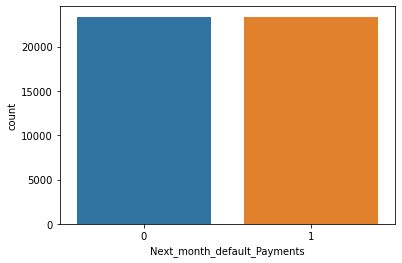

In [48]:
#plot the count plot for defaulter after smote
sns.countplot('Next_month_default_Payments', data = balance_data)

Now its look our dataset is balance

In [49]:
# copying new dataset for model
new_data = balance_data.copy()

# Machine Learning Model - Classification

In [50]:
# required library for ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics  
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [51]:
# selecting the independent and dependent variable.

#independent variables
X = new_data.drop(['Next_month_default_Payments'],axis = 1)
# dependent variable 
y = new_data['Next_month_default_Payments']

In [52]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=0)

In [54]:
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(31307, 84)
Shape of y_train:(31307,)
Shape of X_test:(15421, 84)
Shape of y_test:(15421,)


# LogisticRegression

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [56]:
logistic_regression.coef_

array([[-1.98065536e-01, -1.79339624e-01,  1.39057605e-03,
        -1.93124063e-01,  9.39090644e-02,  3.49237445e-01,
        -5.11398501e-02,  5.31487148e-02, -4.71391547e-02,
        -2.69689079e-01, -3.68336579e-01, -3.14668296e-03,
        -7.45076268e-02, -4.72116257e-02, -3.61821178e-02,
        -6.44824685e-01, -9.15301494e-01, -8.59217372e-01,
        -9.59979726e-01, -1.08916834e+00, -1.72518432e+00,
        -2.21027218e+00, -3.34599111e+00, -1.82425956e+00,
        -1.41805658e+00, -4.47677928e-01, -2.25216441e-01,
        -1.35748160e-01, -8.95118886e-02,  8.00616414e-02,
        -9.02991168e-02, -9.04378406e-01, -1.26121003e+00,
        -1.63213846e+00, -9.10701674e-02, -1.12437529e+00,
        -2.88586156e-01, -1.97183144e-01, -6.68819169e-02,
        -4.92562896e-02, -9.15830583e-02, -1.10273577e-01,
        -1.40533056e+00, -1.61693503e+00, -2.12702731e+00,
        -1.11178476e-01, -1.36236887e+00, -3.03398662e-01,
        -1.96947185e-01, -1.18642115e-01, -9.53902209e-0

In [57]:
logistic_regression.intercept_

array([4.1103649])

In [58]:
# Get the predicted classes
train_class_preds = logistic_regression.predict(X_train)
test_class_preds = logistic_regression.predict(X_test)

In [59]:
# Get the accuracy scores
log_train_accuracy = accuracy_score(train_class_preds,y_train)
log_test_accuracy = accuracy_score(test_class_preds,y_test)

print("The train accuracy is ", log_train_accuracy)
print("The test accuracy is ", log_test_accuracy)

The train accuracy is  0.8661641166512282
The test accuracy is  0.8627196679852149


In [60]:
# print the accuracy,precission,recall,f1,roc_score,confusion_matrix for test data

log_test_accuracy = accuracy_score(test_class_preds,y_test)
log_test_precision_score = precision_score(test_class_preds,y_test)
log_test_recall_score = recall_score(test_class_preds,y_test)
log_test_f1_score = f1_score(test_class_preds,y_test)
log_test_roc_score = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", log_test_accuracy)
print("The precision on test data is ", log_test_precision_score)
print("The recall on test data is ", log_test_recall_score)
print("The f1 on test data is ", log_test_f1_score)
print("The roc_score on test data is ", log_test_roc_score)

The accuracy on test data is  0.8627196679852149
The precision on test data is  0.8
The recall on test data is  0.9165805403809243
The f1 on test data is  0.8543315213651689
The roc_score on test data is  0.8685585403107211


# GridSearch over logistic regression with Hyper parameters

In [61]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

#fit the parameter 
logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [62]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=1000)

In [63]:
# Best parameters 
print('Best parameters:', logistic_grid_model.best_params_)

# Best Score
print('Best Score:', logistic_grid_model.best_score_)

Best parameters: {'C': 1000, 'penalty': 'l2'}
Best Score: 0.8645350285452377


In [64]:
# Get the predicted classes
train_class_pred_grid = logistic_grid_model.predict(X_train)
test_class_pred_grid = logistic_grid_model.predict(X_test)

In [65]:
# Get the accuracy scores
train_accuracy_log_grid = accuracy_score(train_class_pred_grid,y_train)
test_accuracy_log_grid = accuracy_score(test_class_pred_grid,y_test)

print("The accuracy on train data is ", train_accuracy_log_grid)
print("The accuracy on test data is ", test_accuracy_log_grid)

The accuracy on train data is  0.8661002331746893
The accuracy on test data is  0.8629790545360223


The accuracy on test data is  0.8629790545360223
The precision on test data is  0.7998711340206186
The recall on test data is  0.9172454558888725
The f1 on test data is  0.8545467061334068
The roc_score on test data is  0.8688954342074361


The classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      7661
           1       0.92      0.80      0.85      7760

    accuracy                           0.86     15421
   macro avg       0.87      0.86      0.86     15421
weighted avg       0.87      0.86      0.86     15421



The confusion matrix:
 [[7101  560]
 [1553 6207]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

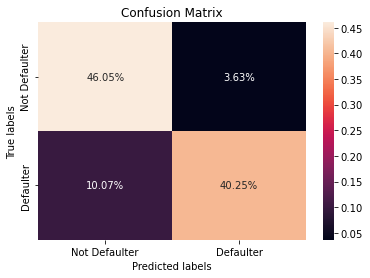

In [66]:
# Evaluation Matrics
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_log = accuracy_score(test_class_pred_grid,y_test)
test_precision_log = precision_score(test_class_pred_grid,y_test)
test_recall_score_log = recall_score(test_class_pred_grid,y_test)
test_f1_score_log = f1_score(test_class_pred_grid,y_test)
test_roc_score_log = roc_auc_score(test_class_pred_grid,y_test)

print("The accuracy on test data is ", test_accuracy_log)
print("The precision on test data is ", test_precision_log)
print("The recall on test data is ", test_recall_score_log)
print("The f1 on test data is ", test_f1_score_log)
print("The roc_score on test data is ", test_roc_score_log)
print('\n')
print('The classification Report:\n', classification_report(y_test,test_class_pred_grid))
print('\n')
# Get the confusion matrix for both train and test
confusion_matrix_grid = confusion_matrix(y_test, test_class_pred_grid)
print('The confusion matrix:\n',confusion_matrix_grid)

# plotting confusion matrix through heatmap
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(confusion_matrix_grid/np.sum(confusion_matrix_grid),annot=True,ax = ax,fmt='.2%') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In logistic regression we got accuracy approx 86%. Let's go ahead with other models and see if they can yield better result.

In [67]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Classifier':'Logistic regression',
       'Train Accuracy':train_accuracy_log_grid,
       'Test Accuracy':test_accuracy_log,
       'Precision Score':test_precision_log,
       'Recall Score':test_recall_score_log,
       'F1 Score':test_f1_score_log,
       'ROC_AUC Score':test_roc_score_log
       }
test_data=pd.DataFrame(dict1,index=[1])

# DECISION TREE CLASSIFIER

In [68]:
# importing the module for decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [70]:
# Get the predicted classes
train_pred_dt = dt_classifier.predict(X_train)
test_pred_dt = dt_classifier.predict(X_test)

In [71]:
# Get the accuracy scores
dt_train_accuracy = accuracy_score(train_pred_dt,y_train)
dt_test_accuracy = accuracy_score(test_pred_dt,y_test)

print("The train accuracy is ", dt_train_accuracy)
print("The test accuracy is ", dt_test_accuracy)

The train accuracy is  0.9996486408790366
The test accuracy is  0.8067570196485312


In [72]:
# print the accuracy,precission,recall,f1,roc_score,confusion_matrix for test data

dt_test_accuracy = accuracy_score(test_pred_dt,y_test)
dt_test_precision_score = precision_score(test_pred_dt,y_test)
dt_test_recall_score = recall_score(test_pred_dt,y_test)
dt_test_f1_score = f1_score(test_pred_dt,y_test)
dt_test_roc_score = roc_auc_score(test_pred_dt,y_test)

print("The accuracy on test data is ", dt_test_accuracy)
print("The precision on test data is ", dt_test_precision_score)
print("The recall on test data is ", dt_test_recall_score)
print("The f1 on test data is ", dt_test_f1_score)
print("The roc_score on test data is ", dt_test_roc_score)

The accuracy on test data is  0.8067570196485312
The precision on test data is  0.8221649484536082
The recall on test data is  0.7994987468671679
The f1 on test data is  0.8106734434561627
The roc_score on test data is  0.8070199015884019


# GridSearch over Decision Tree with Hyper-parameter tuning

In [73]:
# set the parameter 
dt_params = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

dt_grid_model = GridSearchCV(dt_classifier, param_grid= dt_params, scoring = 'recall', cv=3, n_jobs=-1)

dt_grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [74]:
# best estimate value
dt_grid_model.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=8,
                       random_state=0)

In [75]:
# best parameter
print('best parameter:', dt_grid_model.best_params_)

# best model score
print('best model score:', dt_grid_model.best_score_)

best parameter: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}
best model score: 0.7906316530429939


In [76]:
dt_grid_model.score(X_train,y_train)

0.8302999230966419

In [77]:
# Get the predicted classes
dt_train_pred_grid = dt_grid_model.predict(X_train)
dt_test_pred_grid = dt_grid_model.predict(X_test)

In [78]:
# Getting the training and testing accuracy
dt_training_accuracy = accuracy_score(y_train,dt_train_pred_grid)
dt_testing_accuracy = accuracy_score(y_test, dt_test_pred_grid)

print('Training accuracy of decision tree :',dt_training_accuracy)
print('Testing accuracy of decision tree:',dt_testing_accuracy)

Training accuracy of decision tree : 0.8745967355543489
Testing accuracy of decision tree: 0.8302963491342974


Recall score of Decision Tree : 0.7912371134020618
Precision score of Decision Tree : 0.8603054504693849
F1 score of Decision Tree : 0.8243270457139021
ROC-AUC score of Decision Tree : 0.8305487224757339


The Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      7661
           1       0.86      0.79      0.82      7760

    accuracy                           0.83     15421
   macro avg       0.83      0.83      0.83     15421
weighted avg       0.83      0.83      0.83     15421



The Confusion Matrix of the Decision Tree :
 [[6664  997]
 [1620 6140]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

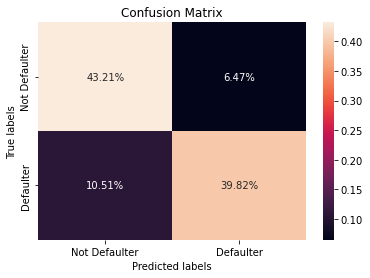

In [79]:
# Getting precision, recall, f1_score, roc_auc_score and confusion matrix
dt_recall_score = recall_score(y_test,dt_test_pred_grid)
dt_precision_score = precision_score(y_test,dt_test_pred_grid)
dt_f1_score = f1_score(y_test, dt_test_pred_grid)
dt_roc_auc_score = roc_auc_score(y_test,dt_test_pred_grid)

# Print all the metrics
print('Recall score of Decision Tree :',dt_recall_score)
print('Precision score of Decision Tree :',dt_precision_score)
print('F1 score of Decision Tree :',dt_f1_score)
print('ROC-AUC score of Decision Tree :',dt_roc_auc_score)
print('\n')
#classification report
print('The Classification Report:\n', classification_report(y_test,dt_test_pred_grid))
print('\n')

# plotting confusion matrix of Decision Tree Classifier
dt_confusion_matrix = confusion_matrix(y_test,dt_test_pred_grid)
print('The Confusion Matrix of the Decision Tree :\n',dt_confusion_matrix)

# plotting confusion matrix through heatmap
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(dt_confusion_matrix/np.sum(dt_confusion_matrix),annot=True,ax = ax,fmt='.2%') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

After gridsearch In dicision tree regression we got accuracy approx 83%. Let's go ahead with other models and see if they can yield better result.

In [80]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Classifier':'Decision Tree',
       'Train Accuracy':dt_training_accuracy,
       'Test Accuracy':dt_testing_accuracy,
       'Precision Score':dt_precision_score,
       'Recall Score':dt_recall_score,
       'F1 Score':dt_f1_score,
       'ROC_AUC Score':dt_roc_auc_score
       }
test_data=test_data.append(dict1,ignore_index=True)

# RandomForest

In [81]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
# Get the predicted classes
train_pred_rf = rf_classifier.predict(X_train)
test_pred_rf = rf_classifier.predict(X_test)

# Get the accuracy scores
rf_train_accuracy = accuracy_score(train_pred_rf,y_train)
rf_test_accuracy = accuracy_score(test_pred_rf,y_test)

print("The accuracy on train data is ", rf_train_accuracy)
print("The accuracy on test data is ", rf_test_accuracy)

The accuracy on train data is  0.9996166991407672
The accuracy on test data is  0.8712794241618572


In [84]:
rf_test_accuracy = accuracy_score(test_pred_rf,y_test)
rf_test_precision_score = precision_score(test_pred_rf,y_test)
rf_test_recall_score = recall_score(test_pred_rf,y_test)
rf_test_f1_score = f1_score(test_pred_rf,y_test)
rf_test_roc_score = roc_auc_score(test_pred_rf,y_test)

print("The accuracy on test data is ", rf_test_accuracy)
print("The precision on test data is ", rf_test_precision_score)
print("The recall on test data is ", rf_test_recall_score)
print("The f1 on test data is ", rf_test_f1_score)
print("The roc_score on test data is ", rf_test_roc_score)

The accuracy on test data is  0.8712794241618572
The precision on test data is  0.830798969072165
The recall on test data is  0.9056047197640118
The f1 on test data is  0.8665904966731637
The roc_score on test data is  0.8737250291183345


# GridSearch over Random Forest with Hyper-parameter tuning

In [85]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

#fit the parameter
rf_grid_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
rf_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [86]:
rf_grid_model.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=150)

In [87]:
rf_grid_model.best_params_

{'max_depth': 20, 'n_estimators': 150}

In [88]:
rf_grid_model.best_score_

0.8702526190929644

In [89]:
# Get the predicted classes
rf_train_pred_grid = rf_grid_model.predict(X_train)
rf_test_pred_grid = rf_grid_model.predict(X_test)

# Get the accuracy scores
rf_train_accuracy = accuracy_score(rf_train_pred_grid,y_train)
rf_test_accuracy = accuracy_score(rf_test_pred_grid,y_test)

print("The accuracy on train data is ", rf_train_accuracy)
print("The accuracy on test data is ", rf_test_accuracy)

The accuracy on train data is  0.9892356342032134
The accuracy on test data is  0.8712145775241553


The accuracy on test data is  0.8712145775241553
The precision on test data is  0.8347938144329897
The recall on test data is  0.9019771651350599
The f1 on test data is  0.8670860661223397
The roc_score on test data is  0.8731878785986017


The Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      7661
           1       0.90      0.83      0.87      7760

    accuracy                           0.87     15421
   macro avg       0.87      0.87      0.87     15421
weighted avg       0.87      0.87      0.87     15421



The confusion matrix:
 [[6957  704]
 [1282 6478]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

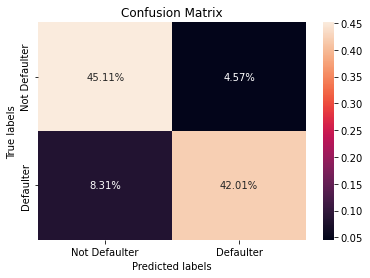

In [90]:
rf_test_accuracy = accuracy_score(rf_test_pred_grid,y_test)
rf_test_precision_score = precision_score(rf_test_pred_grid,y_test)
rf_test_recall_score = recall_score(rf_test_pred_grid,y_test)
rf_test_f1_score = f1_score(rf_test_pred_grid,y_test)
rf_test_roc_score = roc_auc_score(rf_test_pred_grid,y_test)

print("The accuracy on test data is ", rf_test_accuracy)
print("The precision on test data is ", rf_test_precision_score)
print("The recall on test data is ", rf_test_recall_score)
print("The f1 on test data is ", rf_test_f1_score)
print("The roc_score on test data is ", rf_test_roc_score)
print('\n')
#classification report
print('The Classification Report:\n', classification_report(y_test,rf_test_pred_grid))
print('\n')

# Get the confusion matrix for both train and test
rf_confusion_matrix = confusion_matrix(y_test, rf_test_pred_grid)
print('The confusion matrix:\n',rf_confusion_matrix)

# plotting confusion matrix through heatmap
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(rf_confusion_matrix/np.sum(rf_confusion_matrix),annot=True,ax = ax,fmt='.2%') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

After gridsearch In Random forest we got accuracy approx 87%. Let's go ahead with other models and see if they can yield better result.

In [91]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Classifier':'Random forest',
       'Train Accuracy':rf_train_accuracy,
       'Test Accuracy':rf_test_accuracy,
       'Precision Score':rf_test_precision_score,
       'Recall Score':rf_test_recall_score,
       'F1 Score':rf_test_f1_score,
       'ROC_AUC Score':rf_test_roc_score
       }
test_data=test_data.append(dict1,ignore_index=True)

# XG BOOST CLASSIFIER

In [92]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
# Get the y- train & test predicted values
train_pred_xgb = xgb_classifier.predict(X_train)
test_pred_xgb = xgb_classifier.predict(X_test)

#get the accuracy score
xgb_train_accuracy = accuracy_score(train_pred_xgb,y_train)
xgb_test_accuracy = accuracy_score(test_pred_xgb,y_test)

print("The accuracy on train data is ", xgb_train_accuracy)
print("The accuracy on test data is ", xgb_test_accuracy)

The accuracy on train data is  0.9200498291117003
The accuracy on test data is  0.8645353738408663


The accuracy on test data is  0.8645353738408663
The precision on test data is  0.8197164948453608
The recall on test data is  0.9021415402070628
The f1 on test data is  0.8589561812166632
The roc_score on test data is  0.8674984881441528


The Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      7661
           1       0.90      0.82      0.86      7760

    accuracy                           0.86     15421
   macro avg       0.87      0.86      0.86     15421
weighted avg       0.87      0.86      0.86     15421



The confusion matrix:
 [[6971  690]
 [1399 6361]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

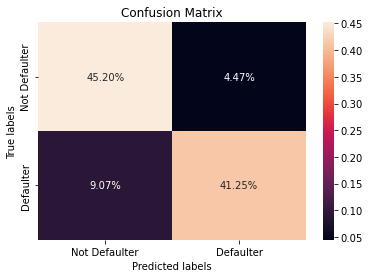

In [94]:
# print the accuracy,precission,recall,f1,roc_score,confusion_matrix for test data

xgb_test_precision_score = precision_score(test_pred_xgb,y_test)
xgb_test_recall_score = recall_score(test_pred_xgb,y_test)
xgb_test_f1_score = f1_score(test_pred_xgb,y_test)
xgb_test_roc_score = roc_auc_score(test_pred_xgb,y_test)

print("The accuracy on test data is ", xgb_test_accuracy)
print("The precision on test data is ", xgb_test_precision_score)
print("The recall on test data is ", xgb_test_recall_score)
print("The f1 on test data is ", xgb_test_f1_score)
print("The roc_score on test data is ", xgb_test_roc_score)
print('\n')
#classification report
print('The Classification Report:\n', classification_report(y_test,test_pred_xgb))
print('\n')

# Get the confusion matrix for both train and test
xgb_confusion_matrix = confusion_matrix(y_test, test_pred_xgb)
print('The confusion matrix:\n',xgb_confusion_matrix)

# plotting confusion matrix through heatmap
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(xgb_confusion_matrix/np.sum(xgb_confusion_matrix),annot=True,ax = ax,fmt='.2%') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In XG BOOST we got accuracy approx 86%. Let's go ahead with other models and see if they can yield better result.

In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Classifier':'XG BOOST',
       'Train Accuracy':xgb_train_accuracy,
       'Test Accuracy':xgb_test_accuracy,
       'Precision Score':xgb_test_precision_score,
       'Recall Score':xgb_test_recall_score,
       'F1 Score':xgb_test_f1_score,
       'ROC_AUC Score':xgb_test_roc_score
       }
test_data=test_data.append(dict1,ignore_index=True)

# KNN-KNeighborsClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
knn_classifier.score(X_test,y_test)

0.8483237144154075

In [98]:
# Get the predicted classes
train_pred_knn = knn_classifier.predict(X_train)
test_pred_knn = knn_classifier.predict(X_test)

In [99]:
# Get the accuracy scores
knn_train_accuracy = accuracy_score(train_pred_knn,y_train)
knn_test_accuracy = accuracy_score(test_pred_knn,y_test)

print("The accuracy on train data is ", knn_train_accuracy)
print("The accuracy on test data is ", knn_test_accuracy)

The accuracy on train data is  0.8890024595138467
The accuracy on test data is  0.8483237144154075


In [100]:
knn_test_accuracy = accuracy_score(test_pred_knn,y_test)
knn_test_precision_score = precision_score(test_pred_knn,y_test)
knn_test_recall_score = recall_score(test_pred_knn,y_test)
knn_test_f1_score = f1_score(test_pred_knn,y_test)
knn_test_roc_score = roc_auc_score(test_pred_knn,y_test)

print("The accuracy on test data is ", knn_test_accuracy)
print("The precision on test data is ", knn_test_precision_score)
print("The recall on test data is ", knn_test_recall_score)
print("The f1 on test data is ", knn_test_f1_score)
print("The roc_score on test data is ", knn_test_roc_score)

The accuracy on test data is  0.8483237144154075
The precision on test data is  0.8118556701030928
The recall on test data is  0.8775595486836607
The f1 on test data is  0.8434299484570588
The roc_score on test data is  0.850209039083398


# GridSearch over KNN with Hyper-parameter tuning

In [102]:
# set param
knn_param_grid = {'n_neighbors':np.arange(1,50)}

knn_grid= GridSearchCV(KNeighborsClassifier(),knn_param_grid,cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [103]:
knn_grid.best_score_

0.8508960709508976

In [104]:
knn_grid.best_params_

{'n_neighbors': 21}

In [105]:
# Setup a knn classifier with k neighbors = 21
knn_grid_model = KNeighborsClassifier(n_neighbors=21)
# Fit the model
knn_grid_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [106]:
# Get the predicted classes
train_pred_knn_grid = knn_grid_model.predict(X_train)
test_pred_knn_grid = knn_grid_model.predict(X_test)

In [107]:
# Get the accuracy scores
knn_train_accuracy = accuracy_score(train_pred_knn_grid,y_train)
knn_test_accuracy = accuracy_score(test_pred_knn_grid,y_test)

print("The accuracy on train data is ", knn_train_accuracy)
print("The accuracy on test data is ", knn_test_accuracy)

The accuracy on train data is  0.8613089724342798
The accuracy on test data is  0.8519551261267103


The accuracy on test data is  0.8519551261267103
The precision on test data is  0.7914948453608247
The recall on test data is  0.9023064492434258
The f1 on test data is  0.8432758975767145
The roc_score on test data is  0.8572363451232221


The Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      7661
           1       0.90      0.79      0.84      7760

    accuracy                           0.85     15421
   macro avg       0.86      0.85      0.85     15421
weighted avg       0.86      0.85      0.85     15421



The confusion matrix:
 [[6996  665]
 [1618 6142]]




[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

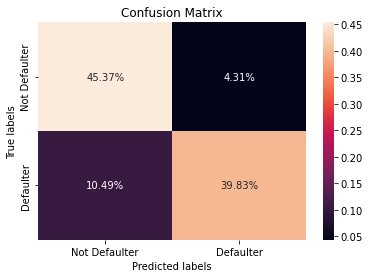

In [108]:
knn_test_accuracy = accuracy_score(test_pred_knn_grid,y_test)
knn_test_precision_score = precision_score(test_pred_knn_grid,y_test)
knn_test_recall_score = recall_score(test_pred_knn_grid,y_test)
knn_test_f1_score = f1_score(test_pred_knn_grid,y_test)
knn_test_roc_score = roc_auc_score(test_pred_knn_grid,y_test)

print("The accuracy on test data is ", knn_test_accuracy)
print("The precision on test data is ", knn_test_precision_score)
print("The recall on test data is ", knn_test_recall_score)
print("The f1 on test data is ", knn_test_f1_score)
print("The roc_score on test data is ", knn_test_roc_score)
print('\n')
#classification report
print('The Classification Report:\n', classification_report(y_test,test_pred_knn_grid))
print('\n')

# Get the confusion matrix for both train and test
knn_confusion_matrix = confusion_matrix(y_test, test_pred_knn_grid)
print('The confusion matrix:\n',knn_confusion_matrix)
print('\n')
# plotting confusion matrix through heatmap
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(knn_confusion_matrix/np.sum(knn_confusion_matrix),annot=True,ax = ax,fmt='.2%') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

After gridsearch In KNN we got accuracy approx 85%.

In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Classifier':'KNN',
       'Train Accuracy':knn_train_accuracy,
       'Test Accuracy':knn_test_accuracy,
       'Precision Score':knn_test_precision_score,
       'Recall Score':knn_test_recall_score,
       'F1 Score':knn_test_f1_score,
       'ROC_AUC Score':knn_test_roc_score
       }
test_data=test_data.append(dict1,ignore_index=True)

# EVALUATION OF ALL MODELS

In [110]:
test_data

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score,ROC_AUC Score
0,Logistic regression,0.866100,0.862979,0.799871,0.917245,0.854547,0.868895
1,Decision Tree,0.874597,0.830296,0.860305,0.791237,0.824327,0.830549
2,Random forest,0.989236,0.871215,0.834794,0.901977,0.867086,0.873188
3,XG BOOST,0.920050,0.864535,0.819716,0.902142,0.858956,0.867498
4,KNN,0.861309,0.851955,0.791495,0.902306,0.843276,0.857236


# PLOTTING ROC AUC CURVE FOR ALL MODEL

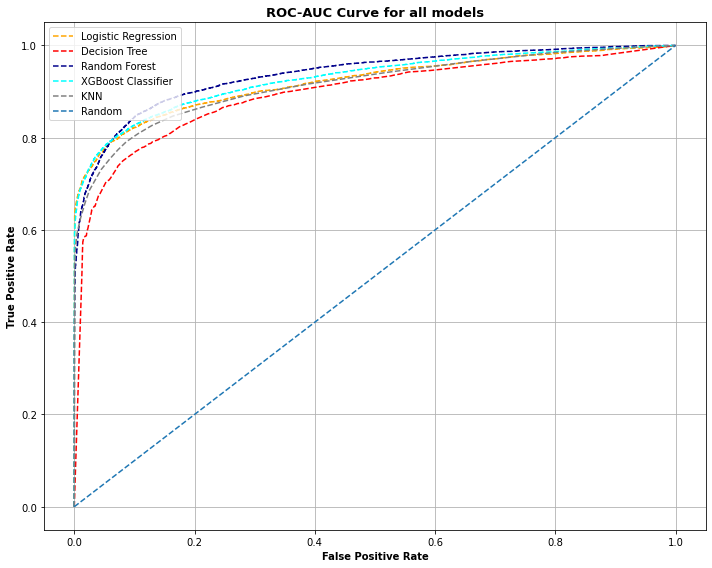

In [111]:
from sklearn import metrics

# predicting probabilities for all model used
y_log_proba = logistic_grid_model.predict_proba(X_test)[::,1]
y_dtc_proba = dt_grid_model.predict_proba(X_test)[::,1]
y_rf_proba = rf_grid_model.predict_proba(X_test)[::,1]
y_xgb_proba = xgb_classifier.predict_proba(X_test)[::,1]
y_knn_proba = knn_grid_model.predict_proba(X_test)[::,1]

# define metrics
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_log_proba)
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  y_dtc_proba)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_rf_proba)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_xgb_proba)
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_knn_proba)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)

# plotting ROC-AUC curve
plt.figure(figsize = (10,8))
plt.grid(True)

plt.plot(fpr_log, tpr_log, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_dtc, tpr_dtc, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='darkblue', label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='cyan', label='XGBoost Classifier')
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='grey', label='KNN')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

# labels
plt.title('ROC-AUC Curve for all models',fontweight = 'bold', fontsize = 13)
plt.xlabel('False Positive Rate',fontweight = 'bold')
plt.ylabel('True Positive Rate',fontweight = 'bold')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Conclusion

1)first We started with data inspection, viewed the data distribution

2)By Visualization we have checked the distribution of defaulters vs non-defaulters and we see around 78% are non-defaulters and 22% are defaulters.

3)the distribution of sex, Education, and Marriage with respect to the defaulter. and we found in Sex more defaulter is Female, in Education, more number of the defaulters is a university students and in Marriage more number of the defaulters by single.

4)After that we built a model(Logistic Regression, Decision Tree, Random forest, XGBoot classifier, and KNN), and all of them in, the best accuracy has obtained from the Random Forest Classifier.

5)Using a Logistic Regression classifier, we can predict with 86.38% accuracy, whether a customer is likely to default next month. Using the Decision Tree classifier, we can predict with 82% accuracy whether a customer is likely to default next month OR not. Using Random Forest, we can predict with 87% accuracy whether a customer will be a defaulter in the next month. Using XGBoost Classifier, we can predict with 86.64% accuracy whether a customer will be a defaulter in the next month. And By applying KNN Classifier with 85% accuracy whether a customer will be a defaulter in the next month.

6)From the Above evaluation table Logistic regression model has the highest recall, if the business cares about recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. but Since the Random Forest classifier has also a higher Recall score.so I would recommend Random Forest.

7)From the above evaluation table we can also see that the Random forest Classifier having Recall, F1-score, and ROC Score values equals 90.46%, 86.92%, and 87.53% resp. and XGBoost Classifier having Recall, F1-score, and ROC Score values equals 90.29%, 86.11%, and 86.92% resp.

8)From the models that are applied to the dataset, We can conclude that these two Random Forest and XGBoost are giving the best evaluation metrics(Recall, F1-score, and ROC-AUC score) and with the help of these two models we are the best to predict whether the credit card is the default or not default according to our analysis.